# EDA PART


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

csv_path = Path.home() / "Documents" / "data1030-fall2025" / "data" / "final_pre.csv" 
df = pd.read_csv(csv_path)
df

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
0       0   0  
1       0   0  
2       0   0  
3       0   0  
4       0   0  
...    ..  ..  
43819   0   0  
43820   0   0  
43821   0   0  
43822   0   0  
43823   0   0  

[43824 rows x 13 columns]

In [2]:
print(df.shape)        
print(df.columns)

(43824, 13)
Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


Time series (line) — PM2.5 over time (daily or weekly aggregate)

Text(0, 0.5, 'pm2.5')

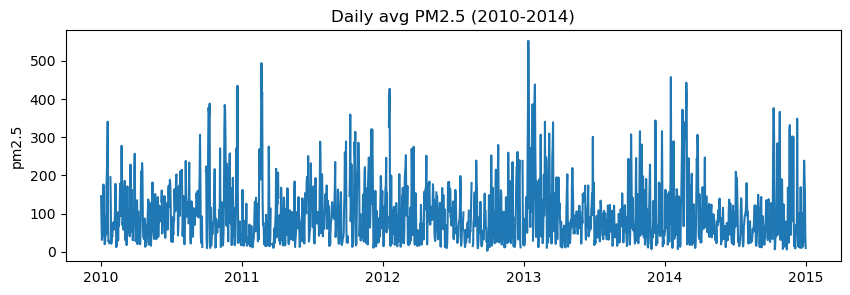

In [3]:
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
ts = df.set_index('datetime')['pm2.5'].resample('D').mean()
plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Daily avg PM2.5 (2010-2014)')
plt.ylabel('pm2.5')

Temperature

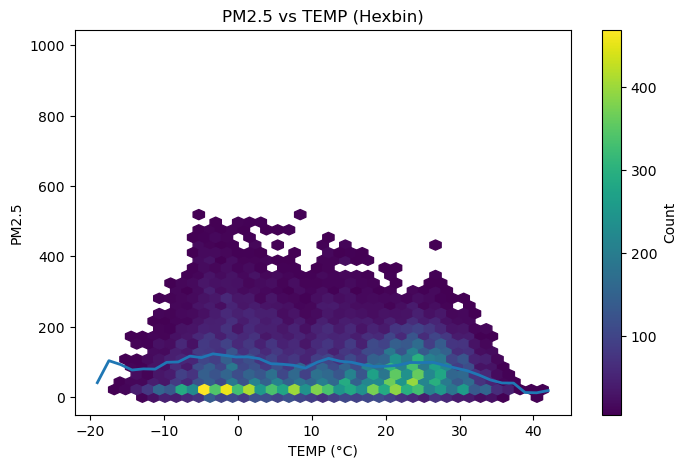

In [4]:
import numpy as np


plt.figure(figsize=(8,5))
clean = df[['TEMP','pm2.5']].dropna()
hb = plt.hexbin(clean['TEMP'], clean['pm2.5'], gridsize=40, mincnt=5)
plt.colorbar(hb, label='Count')
plt.title('PM2.5 vs TEMP (Hexbin)')
plt.xlabel('TEMP (°C)'); plt.ylabel('PM2.5')
bins = np.linspace(clean['TEMP'].min(), clean['TEMP'].max(), 40)
inds = np.digitize(clean['TEMP'], bins)
means = [clean.loc[inds==i, 'pm2.5'].mean() for i in range(1, len(bins)+1)]
plt.plot(bins, means, linewidth=2)

## Wind Direction 

/var/folders/8m/sdygf9451838fny1vdhdj0rh0000gn/T/ipykernel_3498/993196509.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


Text(0, 0.5, 'PM2.5')

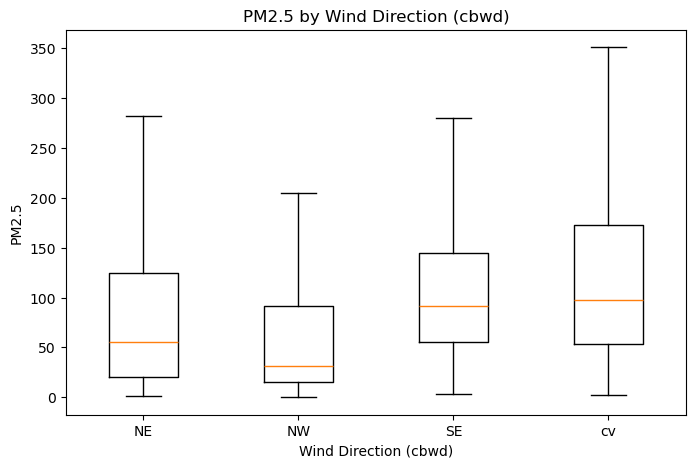

In [6]:
plt.figure(figsize=(8,5))
cats = sorted(df['cbwd'].dropna().unique())
data = [df.loc[df['cbwd']==cat, 'pm2.5'].dropna().values for cat in cats]
plt.boxplot(data, labels=cats, showfliers=False)
plt.title('PM2.5 by Wind Direction (cbwd)')
plt.xlabel('Wind Direction (cbwd)')
plt.ylabel('PM2.5')

## Pressure

/var/folders/8m/sdygf9451838fny1vdhdj0rh0000gn/T/ipykernel_3498/3349593315.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


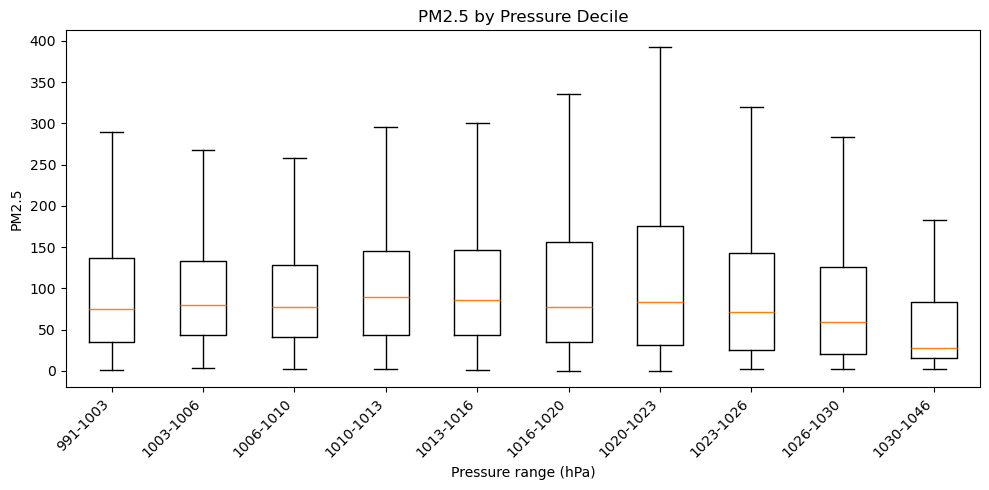

In [7]:
use = df[['PRES','pm2.5']].dropna().rename(columns={'pm2.5':'pm25'})
P, Y = use['PRES'].to_numpy(), use['pm25'].to_numpy()
deciles = np.quantile(P, np.linspace(0,1,11))
labels  = [f'{int(deciles[i])}-{int(deciles[i+1])}' for i in range(10)]
groups  = []
for i in range(10):
    lo, hi = deciles[i], deciles[i+1]
    mask = (P >= lo) & (P < hi) if i < 9 else (P >= lo) & (P <= hi)
    groups.append(Y[mask])

plt.figure(figsize=(10,5))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title('PM2.5 by Pressure Decile')
plt.xlabel('Pressure range (hPa)'); plt.ylabel('PM2.5')
plt.xticks(rotation=45, ha='right'); plt.tight_layout()


## pandas plottig autocorrelation_plot  

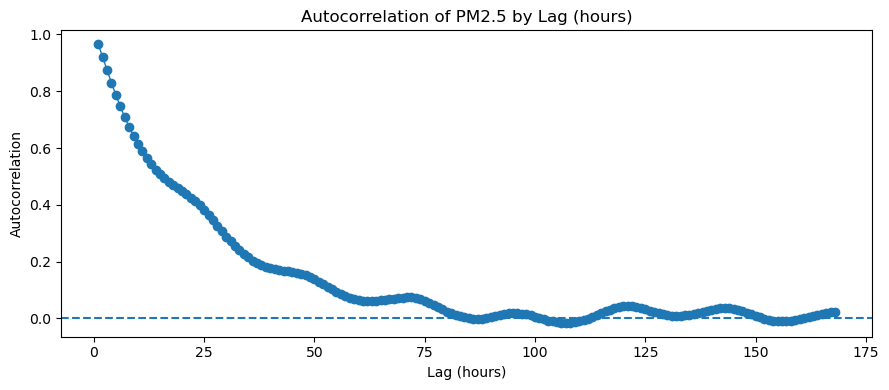

In [9]:
df = df.sort_values('datetime').reset_index(drop=True)
s = df.set_index('datetime')['pm2.5'].astype(float)  
s = df.set_index('datetime')['pm2.5'].astype(float)  
max_lag = 24*7
lags = np.arange(1, max_lag+1)
ac = np.array([s.autocorr(lag=i) for i in lags])

plt.figure(figsize=(9,4))
plt.plot(lags, ac, marker='o', linewidth=1)
plt.axhline(0, linestyle='--')
plt.title('Autocorrelation of PM2.5 by Lag (hours)')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.tight_layout()
# plt.savefig('/mnt/data/pm25_autocorr_line.png', dpi=200)
plt.show()




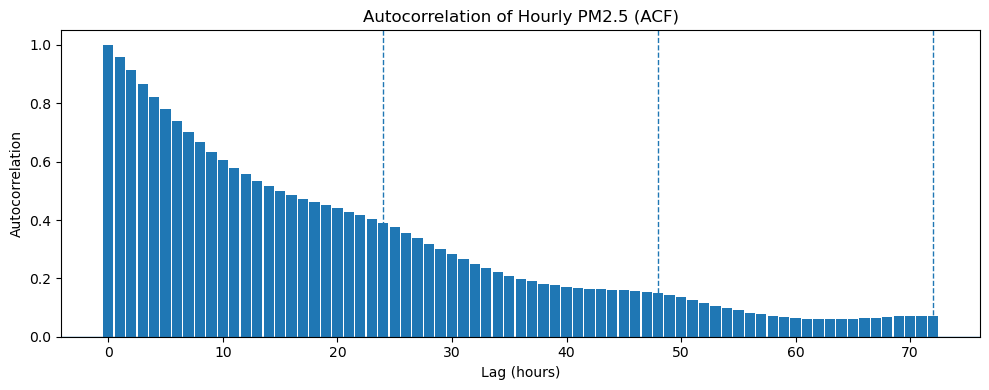

In [ ]:
df = df.sort_values('datetime').reset_index(drop=True)

# Use the hourly target series
y = df['pm2.5'].astype(float)

# ============ 1) Autocorrelation Function (ACF) ============
def acf(series, nlags):
    """Normalized (biased) autocorrelation up to nlags (inclusive)."""
    x = np.asarray(series, dtype=float)
    x = x - np.nanmean(x)
    # Replace NaNs with 0 so correlations skip missing influence
    x = np.where(np.isnan(x), 0.0, x)
    denom = np.dot(x, x)
    acf_vals = [1.0]
    for k in range(1, nlags + 1):
        num = np.dot(x[:-k], x[k:])
        acf_vals.append(num / denom if denom != 0 else np.nan)
    return np.array(acf_vals)

nlags = 72  
acf_vals = acf(y, nlags)

plt.figure(figsize=(10, 4))
plt.bar(range(nlags + 1), acf_vals, width=0.9)
plt.title('Autocorrelation of Hourly PM2.5 (ACF)')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
# Optional reference lines
plt.axhline(0, linewidth=1)
# Annotate daily-cycle lags
for k in (24, 48, 72):
    if k <= nlags:
        plt.axvline(k, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


# Splitting: time series

In [33]:
# --- build X, y (pick your features) ---
feat_cols = ['DEWP','TEMP','PRES','Iws','Is','Ir']  # add engineered cols if you have them
target    = 'pm2.5'

df_ = df.sort_values('datetime').dropna(subset=[target]).reset_index(drop=True)
X = df_[feat_cols].to_numpy()
y = df_[target].to_numpy()

# --- time-aware split: 80% "other" (for TS CV), 20% final test ---
n = len(X)
nts = int(0.2 * n)          # 20% test
n_other = n - nts           # 80% "other" (train+val combined)

# oldest 80% → used for TimeSeriesSplit CV and training
X_other, y_other = X[:n_other], y[:n_other]

# most recent 20% → held-out test set
X_test,  y_test  = X[n_other:], y[n_other:]

print('other set (for TS CV + training):', X_other.shape, y_other.shape)  # 80%
print('test set:',                       X_test.shape,  y_test.shape)     # 20%

# save split dates (handy for captions)
date_other_end = df_.loc[n_other-1, 'datetime']
date_test_end  = df_.iloc[-1]['datetime']
print("Other end:", date_other_end, "| Test end:", date_test_end)


other set (for TS CV + training): (33387, 6) (33387,)
test set: (8346, 6) (8346,)
Other end: 2014-01-14 07:00:00 | Test end: 2014-12-31 23:00:00


/var/folders/8m/sdygf9451838fny1vdhdj0rh0000gn/T/ipykernel_3498/2334346647.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


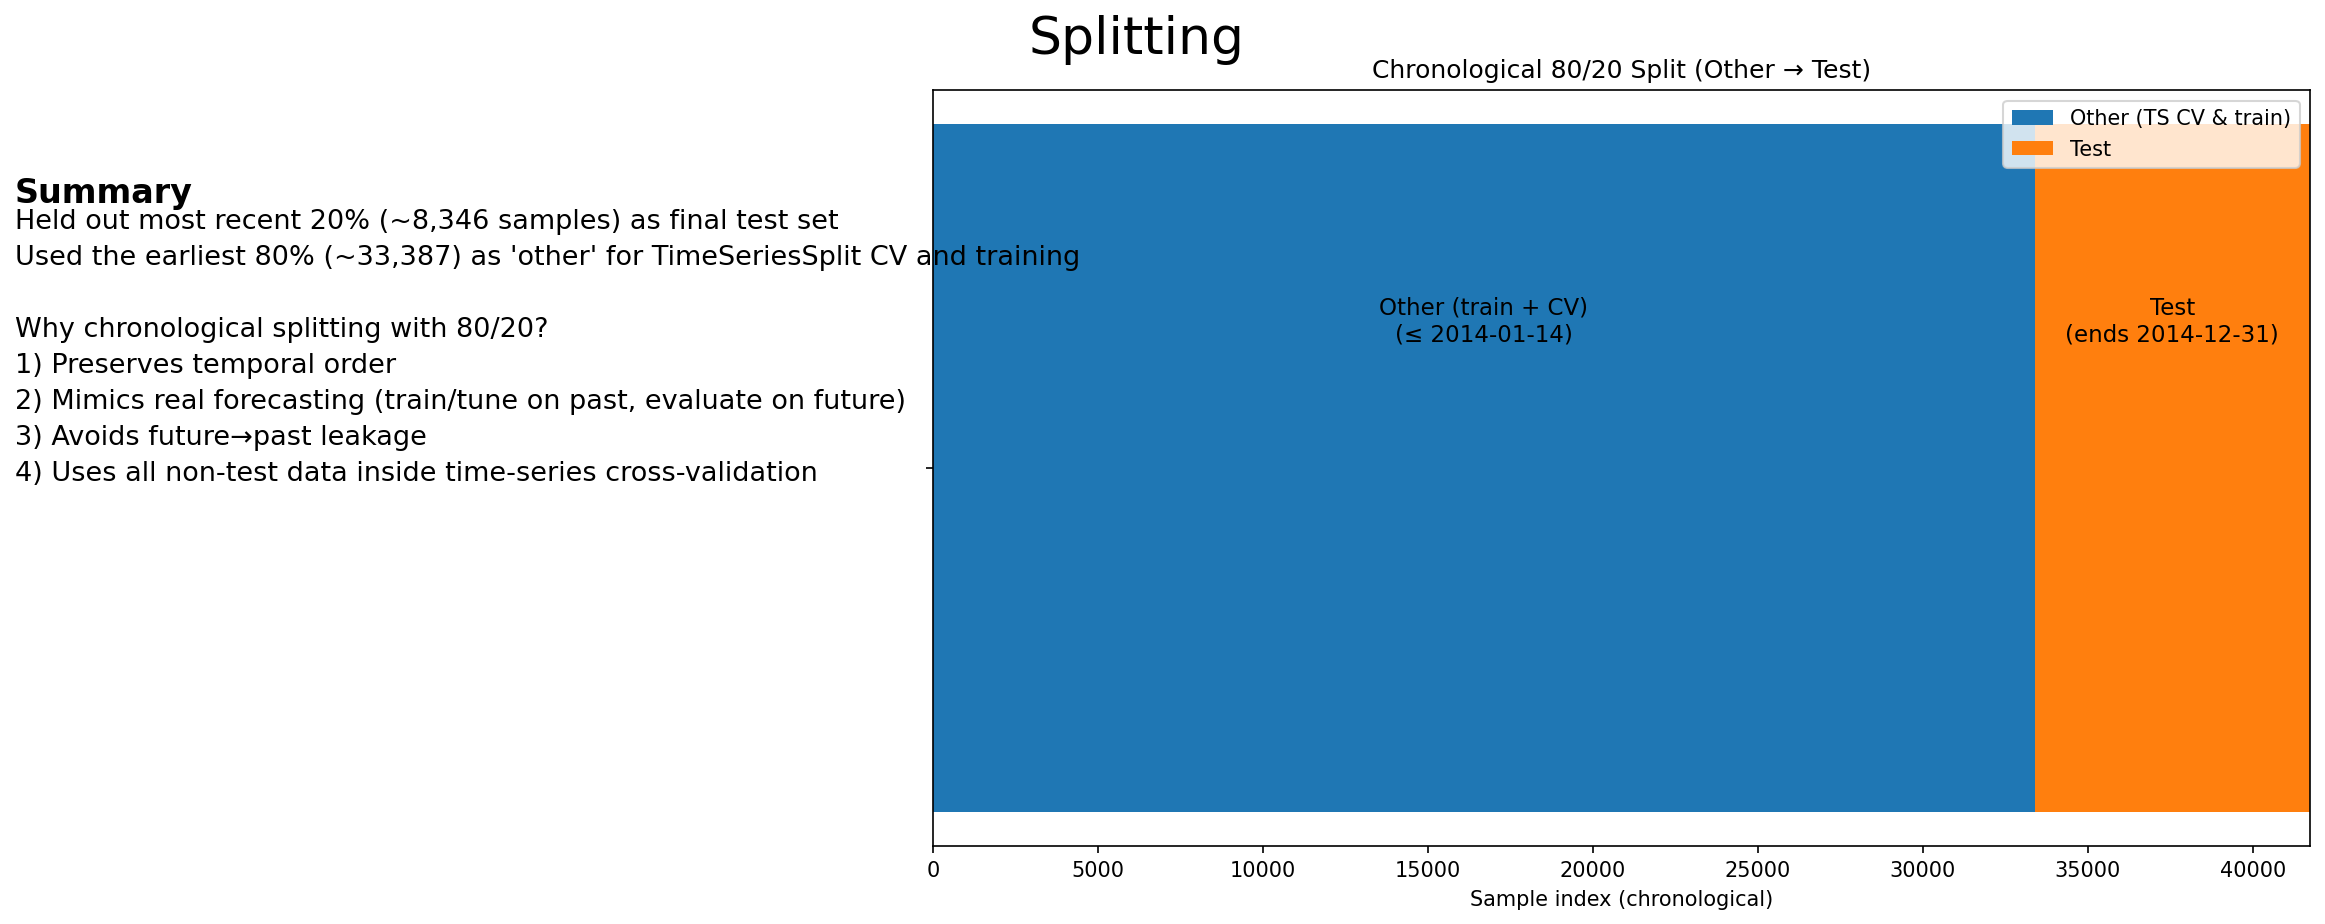

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Ensure df has a datetime column and is sorted chronologically
df_ = df.sort_values('datetime').dropna(subset=['pm2.5']).reset_index(drop=True)

# 1) 80/20 chronological split (NO shuffling)
feat_cols = ['DEWP','TEMP','PRES','Iws','Is','Ir']  
n = len(df_)

nts     = int(0.20 * n)          # most recent 20% → Test
n_other = n - nts                # oldest 80% → "Other" (train+CV)

date_other_end = df_.loc[n_other-1, 'datetime']
date_test_end  = df_.iloc[-1]['datetime']

# 2) Build the slide
fig = plt.figure(figsize=(17, 7.2), dpi=150)
fig.suptitle('Splitting', fontsize=25, y=0.95)

# Right: horizontal bar diagram (single axes)
ax = fig.add_axes([0.42, 0.18, 0.54, 0.70])  # left, bottom, width, height
ax.barh(1, width=n_other, left=0,        height=0.45, label='Other (TS CV & train)')
ax.barh(1, width=nts,     left=n_other,  height=0.45, label='Test')

ax.set_yticks([1]); ax.set_yticklabels([''])
ax.set_xlim(0, n)
ax.set_xlabel('Sample index (chronological)')
ax.set_title('Chronological 80/20 Split (Other → Test)')
ax.legend(loc='upper right')

# Annotate with end dates
ax.text(n_other/2, 1.08,
        f"Other (train + CV)\n(≤ {date_other_end.date()})",
        ha='center', va='bottom', fontsize=11)
ax.text(n_other + nts/2, 1.08,
        f"Test\n(ends {date_test_end.date()})",
        ha='center', va='bottom', fontsize=11)

# Left: summary bullets
bullets = [
    f"Held out most recent 20% (~{nts:,} samples) as final test set",
    f"Used the earliest 80% (~{n_other:,}) as 'other' for TimeSeriesSplit CV and training",
    "",
    "Why chronological splitting with 80/20?",
    "1) Preserves temporal order",
    "2) Mimics real forecasting (train/tune on past, evaluate on future)",
    "3) Avoids future→past leakage",
    "4) Uses all non-test data inside time-series cross-validation",
]
fig.text(0.06, 0.80, "Summary", fontsize=16, fontweight='bold', ha='left', va='top')
fig.text(0.06, 0.77, "\n".join(bullets), fontsize=13, ha='left', va='top', linespacing=1.5)

plt.tight_layout()
plt.show()


# Preprocessing

handle missing values + Standardscaler

In [75]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

target_col = "pm2.5"

# ----- 1. Feature engineering as before -----
df = df.sort_values("datetime").reset_index(drop=True)

df["hour"] = df["datetime"].dt.hour
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

df["pm2_1"] = df[target_col].shift(1)
df["pm2_24"] = df[target_col].shift(24)
df["pm2_24_mean"] = df[target_col].rolling(24).mean().shift(1)

candidate_features = [
    "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir",
    "hour_sin", "hour_cos",
    "pm2_1", "pm2_24", "pm2_24_mean"
]

# drop rows with missing target (we never train on those)
df = df.dropna(subset=[target_col])

# ----- 2. Pattern submodel / reduced-features step -----
# mask[i, j] = True if feature j is missing in row i
mask = df[candidate_features].isna()

# find unique missingness patterns across features
unique_rows, counts = np.unique(mask.values, axis=0, return_counts=True)
print("Number of distinct missingness patterns:", unique_rows.shape[0])

# choose the most frequent pattern
best_idx = np.argmax(counts)
best_pattern = unique_rows[best_idx]
print("Most common pattern count:", counts[best_idx])

# features that are NOT missing under this pattern = reduced feature set
reduced_features = [
    f for f, is_missing in zip(candidate_features, best_pattern) if not is_missing
]
print("Reduced features used:", reduced_features)

# keep only rows that follow this pattern
rows_keep = (mask.values == best_pattern).all(axis=1)
df_reduced = df.loc[rows_keep].copy()

print("Rows kept after pattern selection:", df_reduced.shape[0])

# by construction, df_reduced[reduced_features] has no missing values
assert not df_reduced[reduced_features].isna().any().any()

# ----- 3. Time-based split on the reduced dataset -----
split_val = pd.to_datetime("2014-01-01")
split_test = pd.to_datetime("2014-07-01")

train = df_reduced[df_reduced["datetime"] < split_val]
val   = df_reduced[(df_reduced["datetime"] >= split_val) &
                   (df_reduced["datetime"] < split_test)]
test  = df_reduced[df_reduced["datetime"] >= split_test]

X_train, y_train = train[reduced_features], train[target_col]
X_val,   y_val   = val[reduced_features],   val[target_col]
X_test,  y_test  = test[reduced_features],  test[target_col]

print("Shapes (train/val/test):",
      X_train.shape, X_val.shape, X_test.shape)

# ----- 4. Preprocessing pipeline: ONLY scaling, no imputer -----
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", num_transformer, reduced_features)]
)

# Fit on train, transform all splits
Xtr = preprocessor.fit_transform(X_train)
Xva = preprocessor.transform(X_val)
Xte = preprocessor.transform(X_test)

print("Shapes after preprocessing:", Xtr.shape, Xva.shape, Xte.shape)


Number of distinct missingness patterns: 3
Most common pattern count: 41589
Reduced features used: ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'hour_sin', 'hour_cos', 'pm2_1', 'pm2_24', 'pm2_24_mean']
Rows kept after pattern selection: 41589
Shapes (train/val/test): (32928, 11) (4311, 11) (4350, 11)
Shapes after preprocessing: (32928, 11) (4311, 11) (4350, 11)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

target_col = "pm2.5"

# 1) Sort by time and drop rows where TARGET is missing
df = df.sort_values("datetime").reset_index(drop=True)
df = df.dropna(subset=[target_col])

# 2) Create time-based features
df["hour"] = df["datetime"].dt.hour
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

# 3) Create lag features (these introduce NaNs at the beginning)
df["pm2_1"] = df[target_col].shift(1)
df["pm2_24"] = df[target_col].shift(24)
df["pm2_24_mean"] = df[target_col].rolling(24).mean().shift(1)

# 4) Drop rows where lag features are missing (not enough history)
df = df.dropna(subset=["pm2_1", "pm2_24", "pm2_24_mean"]).reset_index(drop=True)

print("Any NaNs left in target after cleaning?:", df[target_col].isna().any())

# 5) Candidate features
candidate_features = [
    "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir",
    "hour_sin", "hour_cos",
    "pm2_1", "pm2_24", "pm2_24_mean"
]

X_full = df[candidate_features]
y_full = df[target_col]

# 6) Pattern-submodel: find most common missingness pattern
mask = X_full.isna()                                # True = missing
unique_rows, counts = np.unique(mask.values, axis=0, return_counts=True)
best_idx = np.argmax(counts)
best_pattern = unique_rows[best_idx]

print("Number of distinct missingness patterns:", unique_rows.shape[0])
print("Most common pattern count:", counts[best_idx])

# Features that are always observed under this pattern = reduced features
reduced_features = [
    f for f, is_missing in zip(candidate_features, best_pattern) if not is_missing
]
print("Reduced features used:", reduced_features)

# Keep only rows that match this pattern
rows_keep = (mask.values == best_pattern).all(axis=1)
df_reduced = df.loc[rows_keep].reset_index(drop=True)
X = df_reduced[reduced_features]
y = df_reduced[target_col]

print("Rows kept after pattern selection:", df_reduced.shape[0])

# 7) Chronological 80/20 split (other/test) on reduced data
n = len(df_reduced)
nts = int(0.20 * n)        # 20% test
n_other = n - nts          # 80% "other" (for TS CV + training)

X_other, y_other = X.iloc[:n_other], y.iloc[:n_other]
X_test,  y_test  = X.iloc[n_other:], y.iloc[n_other:]

print("Shapes:")
print("  X_other:", X_other.shape, "y_other:", y_other.shape)
print("  X_test: ", X_test.shape,  "y_test: ", y_test.shape)

print("\nDate ranges:")
print("  Other:", df_reduced.loc[:n_other-1, "datetime"].min(), "→",
                  df_reduced.loc[:n_other-1, "datetime"].max())
print("  Test: ", df_reduced.loc[n_other:, "datetime"].min(),   "→",
                  df_reduced.loc[n_other:, "datetime"].max())

# 8) Preprocessing: ONLY scaling (no imputation needed now)
num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", num_transformer, reduced_features)]
)

# 9) Fit preprocessor on OTHER only, transform BOTH OTHER and TEST
X_other_proc = preprocessor.fit_transform(X_other)
X_test_proc  = preprocessor.transform(X_test)

print("\nFeature count BEFORE preprocessing:", len(reduced_features))
print("Feature count AFTER preprocessing:", X_other_proc.shape[1])
print("Rows (other/test):", X_other_proc.shape[0], X_test_proc.shape[0])



Any NaNs left in target after cleaning?: False
Number of distinct missingness patterns: 1
Most common pattern count: 41565
Reduced features used: ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'hour_sin', 'hour_cos', 'pm2_1', 'pm2_24', 'pm2_24_mean']
Rows kept after pattern selection: 41565
Shapes:
  X_other: (33252, 11) y_other: (33252,)
  X_test:  (8313, 11) y_test:  (8313,)

Date ranges:
  Other: 2010-01-10 00:00:00 → 2014-01-15 16:00:00
  Test:  2014-01-15 17:00:00 → 2014-12-31 23:00:00

Feature count BEFORE preprocessing: 11
Feature count AFTER preprocessing: 11
Rows (other/test): 33252 8313


',No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,hour_sin,hour_cos,pm2_1,pm2_24,pm2_24_mean\n0,217,2010,1,10,0,75.0,-15,-11.0,1033.0,NW,0.89,0,0,2010-01-10 00:00:00,0.0,1.0,66.0,165.0,88.5\n1,218,2010,1,10,1,82.0,-17,-13.0,1033.0,NW,1.78,0,0,2010-01-10 01:00:00,0.25881904510252074,0.9659258262890683,75.0,159.0,84.75\n2,219,2010,1,10,2,66.0,-17,-12.0,1033.0,NW,4.91,0,0,2010-01-10 02:00:00,0.49999999999999994,0.8660254037844387,82.0,167.0,81.54166666666667\n3,220,2010,1,10,3,83.0,-17,-13.0,1033.0,NW,8.04,0,0,2010-01-10 03:00:00,0.7071067811865475,0.7071067811865476,66.0,196.0,77.33333333333333\n4,221,2010,1,10,4,62.0,-19,-14.0,1032.0,NW,9.83,0,0,2010-01-10 04:00:00,0.8660254037844386,0.5000000000000001,83.0,169.0,72.625\n5,222,2010,1,10,5,40.0,-18,-13.0,1032.0,NW,12.96,0,0,2010-01-10 05:00:00,0.9659258262890683,0.25881904510252074,62.0,155.0,68.16666666666667\n6,223,2010,1,10,6,23.0,-19,-13.0,1032.0,NW,16.09,0,0,2010-01-10 06:00:00,1.0,6.123233995736766e-17,40.0,119.

In [ ]:
from pathlib import Path
from joblib import dump

# Save raw + preprocessed objects into a single joblib file
# Uses `out_dir` and `dump` (from joblib) defined in later cells -- those cells can be executed first.

all_objs = {}
candidates = [
    "df", "df_reduced",
    "train", "val", "test", "other",
    "X_full", "y_full", "X", "y",
    "X_other", "y_other", "X_test", "y_test",
    "Xtr", "Xva", "Xte",
    "X_other_proc", "X_test_proc",
    "preprocessor", "lin_pipe", "pipe", "rf_pipe", "knn_pipe", "svr_pipe", "ridge_pipe", "lin_final"
]

for name in candidates:
    if name in globals():
        all_objs[name] = globals()[name]

# Ensure output directory exists; prefer existing out_dir if present, otherwise create a local folder
if "out_dir" in globals() and isinstance(out_dir, Path):
    dest_dir = out_dir 
else:
    dest_dir = Path.cwd() / "all_data"
dest_dir.mkdir(parents=True, exist_ok=True)

fp = dest_dir / "raw_preprocess_data.joblib"
dump(all_objs, fp)
print(f"Saved {len(all_objs)} objects to: {fp}")
print("Keys:", ", ".join(sorted(all_objs.keys())))

Saved 27 objects to: /Users/anothpbt/Documents/data1030-fall2025/raw_preprocess/raw_preprocess_data.joblib
Keys: X, X_full, X_other, X_other_proc, X_test, X_test_proc, Xte, Xtr, Xva, df, df_reduced, knn_pipe, lin_final, lin_pipe, other, pipe, preprocessor, rf_pipe, ridge_pipe, svr_pipe, test, train, val, y, y_full, y_other, y_test


## Choose an evaluation metric(Regression): RMSE

why choose RMSE: 
Same units as PM2.5. RMSE is the square root of MSE, so it’s in µg/m³, the same units as the target and heavily penalizes large error.

# Choose ML techniques

In [77]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np
import pandas as pd

# Time-series CV on the 80% "other" block
cv = TimeSeriesSplit(n_splits=5)

# Models to compare (including baseline)
models_cv = {
    "BaselineMean": DummyRegressor(strategy="mean"),

    # All of these count as ONE "linear family" method for the assignment
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=1.0)": Ridge(alpha=1.0),

    # Non-linear tree-based model
    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),

    # Non-linear kernel model
    "SVR_RBF": SVR(kernel="rbf", C=10.0, gamma="scale"),

    "KNN": KNeighborsRegressor(
        n_neighbors=5,
        weights="distance"   # closer neighbors get more weight
    ),
}

cv_rows = []

for name, model in models_cv.items():
    pipe = Pipeline([
        ("pre", preprocessor),   # StandardScaler
        ("model", model)
    ])

    # Use neg_mean_squared_error and convert to RMSE manually
    neg_mse_scores = cross_val_score(
        pipe,
        X_other,   # <--- use 80% "other" set, NOT test
        y_other,
        scoring="neg_mean_squared_error",
        cv=cv,
        n_jobs=-1
    )

    rmse_scores = np.sqrt(-neg_mse_scores)

    cv_rows.append({
        "model": name,
        "rmse_mean": rmse_scores.mean(),
        "rmse_std": rmse_scores.std()
    })

cv_summary = (
    pd.DataFrame(cv_rows)
      .set_index("model")
      .sort_values("rmse_mean")
)

print("CV RMSE (mean ± std) on OTHER period (80%):")
print(cv_summary.round(3))


CV RMSE (mean ± std) on OTHER period (80%):
                  rmse_mean  rmse_std
model                                
LinearRegression     23.709     3.379
Ridge(alpha=1.0)     23.710     3.379
RandomForest         28.239     7.250
KNN                  33.758     6.384
SVR_RBF              35.061    15.489
BaselineMean         93.226    16.314


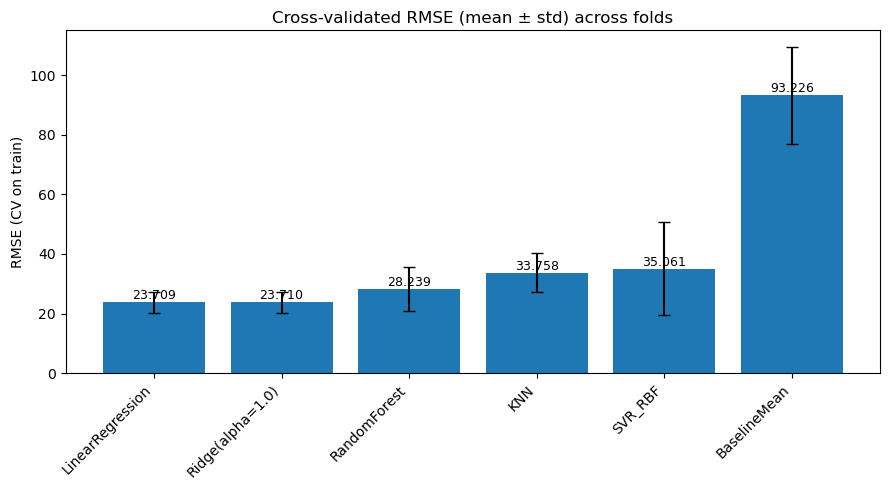

In [78]:
import matplotlib.pyplot as plt

models = cv_summary.index
means  = cv_summary["rmse_mean"].values
stds   = cv_summary["rmse_std"].values

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(x, means, yerr=stds, capsize=4)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_ylabel("RMSE (CV on train)")
ax.set_title("Cross-validated RMSE (mean ± std) across folds")


for i, m in enumerate(means):
    ax.text(
        x[i],
        m,
        f"{m:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()


# Tune Hyperparameter

In [79]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# ---------------------------------
# Time-series cross-validation on OTHER (80%) only
# ---------------------------------
ts_cv = TimeSeriesSplit(n_splits=5)

tuned_rows = []

# ---------------------------------
# 1) Baseline (no tuning)
# ---------------------------------
baseline = DummyRegressor(strategy="mean")
baseline_pipe = Pipeline([
    ("pre", preprocessor),     # still run preprocessor for consistency
    ("model", baseline)
])

neg_mse_cv = cross_val_score(
    baseline_pipe,
    X_other, y_other,
    scoring="neg_mean_squared_error",
    cv=ts_cv,
    n_jobs=-1
)
baseline_rmse_cv = np.sqrt(-neg_mse_cv)

baseline_pipe.fit(X_other, y_other)
y_test_pred = baseline_pipe.predict(X_test)
baseline_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

tuned_rows.append({
    "model": "BaselineMean",
    "best_params": {},
    "cv_rmse_mean": baseline_rmse_cv.mean(),
    "cv_rmse_std":  baseline_rmse_cv.std(),
    "test_rmse":    baseline_test_rmse
})

print(f"[Baseline] CV RMSE: {baseline_rmse_cv.mean():.5f} ± {baseline_rmse_cv.std():.5f}")
print(f"[Baseline] Test RMSE: {baseline_test_rmse:.5f}")


# ---------------------------------
# Helper: run grid search + collect metrics
# ---------------------------------
def tune_model(name, base_pipe, param_grid):
    grid = GridSearchCV(
        estimator=base_pipe,
        param_grid=param_grid,
        cv=ts_cv,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_other, y_other)

    best_est    = grid.best_estimator_
    best_params = grid.best_params_

    # RMSE by fold for the best estimator
    neg_mse_scores = cross_val_score(
        best_est,
        X_other, y_other,
        scoring="neg_mean_squared_error",
        cv=ts_cv,
        n_jobs=-1
    )
    rmse_scores = np.sqrt(-neg_mse_scores)

    # Evaluate on TEST only (20% final holdout)
    y_test_pred = best_est.predict(X_test)
    test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

    tuned_rows.append({
        "model":        name,
        "best_params":  best_params,
        "cv_rmse_mean": rmse_scores.mean(),
        "cv_rmse_std":  rmse_scores.std(),
        "test_rmse":    test_rmse
    })

    print(f"\n[{name}] best params: {best_params}")
    print(f"[{name}] CV RMSE: {rmse_scores.mean():.5f} ± {rmse_scores.std():.5f}")
    print(f"[{name}] Test RMSE: {test_rmse:.5f}")


# ---------------------------------
# 2) Linear Regression
# ---------------------------------
lin = LinearRegression()
lin_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", lin)
])
lin_grid = {
    "model__fit_intercept": [True, False],
    # "model__positive": [False, True],
}
tune_model("LinearRegression", lin_pipe, lin_grid)


# 3) Ridge Regression
ridge = Ridge()
ridge_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", ridge)
])
ridge_grid = {
    # log-spaced from very small to strong regularization
    "model__alpha": np.logspace(-3, 3, 7)   # [0.001, 0.01, ..., 1000]
}
tune_model("Ridge", ridge_pipe, ridge_grid)


# 4) Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", rf)
])
rf_grid = {
    "model__n_estimators":      [200, 400],
    "model__max_depth":         [10, 30, None],
    "model__max_features":      ["sqrt", 0.5],
    "model__min_samples_leaf":  [1, 3, 5],
    "model__min_samples_split": [2, 5]
}
tune_model("RandomForest", rf_pipe, rf_grid)



# 5) SVR with RBF kernel
svr = SVR(kernel="rbf")
svr_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", svr)
])
svr_grid = {
    "model__C":       [1, 10, 100, 300],
    "model__gamma":   ["scale", 0.3, 0.1, 0.03, 0.01],
    "model__epsilon": [0.1, 0.5, 1.0],
}
tune_model("SVR_RBF", svr_pipe, svr_grid)


# 6) KNN Regressor
knn = KNeighborsRegressor()
knn_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", knn)
])
knn_grid = {
    "model__n_neighbors": [3, 5, 10],
    "model__weights":     ["uniform", "distance"],
}
tune_model("KNN", knn_pipe, knn_grid)


# 8) Summary table
tuned_df = pd.DataFrame(tuned_rows).set_index("model")
print("\n=== Tuned models summary ===")
print(tuned_df[["cv_rmse_mean", "cv_rmse_std", "test_rmse"]].round(3))


[Baseline] CV RMSE: 93.22556 ± 16.31447
[Baseline] Test RMSE: 94.42480
Fitting 5 folds for each of 2 candidates, totalling 10 fits

[LinearRegression] best params: {'model__fit_intercept': True}
[LinearRegression] CV RMSE: 23.70894 ± 3.37872
[LinearRegression] Test RMSE: 21.62509
Fitting 5 folds for each of 7 candidates, totalling 35 fits

[Ridge] best params: {'model__alpha': np.float64(0.001)}
[Ridge] CV RMSE: 23.70894 ± 3.37872
[Ridge] Test RMSE: 21.62509
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/miniconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[RandomForest] best params: {'model__max_depth': 30, 'model__max_features': 0.5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 400}
[RandomForest] CV RMSE: 25.62883 ± 5.20263
[RandomForest] Test RMSE: 21.58285
Fitting 5 folds for each of 60 candidates, totalling 300 fits

[SVR_RBF] best params: {'model__C': 300, 'model__epsilon': 1.0, 'model__gamma': 0.01}
[SVR_RBF] CV RMSE: 24.17942 ± 3.97913
[SVR_RBF] Test RMSE: 21.07424
Fitting 5 folds for each of 6 candidates, totalling 30 fits

[KNN] best params: {'model__n_neighbors': 10, 'model__weights': 'distance'}
[KNN] CV RMSE: 32.46693 ± 6.35080
[KNN] Test RMSE: 26.00890

=== Tuned models summary ===
                  cv_rmse_mean  cv_rmse_std  test_rmse
model                                                 
BaselineMean            93.226       16.314     94.425
LinearRegression        23.709        3.379     21.625
Ridge                   23.709        3.379     21.625
RandomForest            25.629  

# Results


Baseline & test scores for each algorithm

In [80]:
import pandas as pd
import numpy as np

# Build DataFrame from tuned_rows: one row per model
df_cv = pd.DataFrame(tuned_rows).set_index("model")

# Sort by mean CV RMSE (lower is better)
df_cv = df_cv.sort_values("cv_rmse_mean")
print("Models & CV RMSE summary (sorted, lower is better):")
print(df_cv[["cv_rmse_mean", "cv_rmse_std", "test_rmse"]].round(3))

# ---------- (a) Baseline summary ----------
baseline_mean = df_cv.loc["BaselineMean", "cv_rmse_mean"]
baseline_std  = df_cv.loc["BaselineMean", "cv_rmse_std"]

print(f"\nBaseline (DummyRegressor) CV RMSE: "
      f"{baseline_mean:.3f} ± {baseline_std:.3f}")

# ---------- (b) Best ML model EXCLUDING baseline ----------
ml_only = df_cv.drop(index="BaselineMean")        # drop baseline row
best_model_name = ml_only["cv_rmse_mean"].idxmin()   # model with smallest mean CV RMSE
best_rmse_mean  = ml_only.loc[best_model_name, "cv_rmse_mean"]
best_rmse_std   = ml_only.loc[best_model_name, "cv_rmse_std"]

print(f"\nBest ML model (excluding baseline): {best_model_name}")
print(f"  CV RMSE ≈ {best_rmse_mean:.3f} ± {best_rmse_std:.3f}")

# ---------- (c) Improvement over baseline ----------
improvement = baseline_mean - best_rmse_mean      # positive = better than baseline
frac_improvement = improvement / baseline_mean    # fractional improvement

if baseline_std > 0:
    std_improvement = improvement / baseline_std
else:
    std_improvement = np.nan

print(f"\nImprovement over baseline: {improvement:.3f} RMSE")
print(f"  Fraction of baseline RMSE: {frac_improvement:.3f} "
      f"(~{frac_improvement*100:.1f}% better)")
print(f"  In units of baseline std: {std_improvement:.3f} standard deviations better")

# ---------- (d) (Optional) overall best including baseline ----------
overall_best_name = df_cv["cv_rmse_mean"].idxmin()
overall_best_mean = df_cv.loc[overall_best_name, "cv_rmse_mean"]
print(f"\nOverall best (including baseline): {overall_best_name} "
      f"with CV RMSE ≈ {overall_best_mean:.3f}")


Models & CV RMSE summary (sorted, lower is better):
                  cv_rmse_mean  cv_rmse_std  test_rmse
model                                                 
LinearRegression        23.709        3.379     21.625
Ridge                   23.709        3.379     21.625
SVR_RBF                 24.179        3.979     21.074
RandomForest            25.629        5.203     21.583
KNN                     32.467        6.351     26.009
BaselineMean            93.226       16.314     94.425

Baseline (DummyRegressor) CV RMSE: 93.226 ± 16.314

Best ML model (excluding baseline): LinearRegression
  CV RMSE ≈ 23.709 ± 3.379

Improvement over baseline: 69.517 RMSE
  Fraction of baseline RMSE: 0.746 (~74.6% better)
  In units of baseline std: 4.261 standard deviations better

Overall best (including baseline): LinearRegression with CV RMSE ≈ 23.709


In [81]:
import pandas as pd

# Use the tuned_df DataFrame produced earlier (tuned_summary was not defined)
# tuned_df: index = model name, cols = best_params, cv_rmse_mean, cv_rmse_std, val_rmse, test_rmse

results_table = (
    tuned_df
    .reset_index()
    .rename(columns={
        "model": "Model",
        "cv_rmse_mean": "CV RMSE (mean)",
        "cv_rmse_std":  "CV RMSE (std)",
        "test_rmse":    "Test RMSE"
    })
)

# Sort by Test RMSE (best at top) and round for nicer display
results_table = (
    results_table
    .sort_values("Test RMSE")
    .reset_index(drop=True)
    .round(5)
)

print("Models & Test Performance (RMSE)")
display(results_table)


Models & Test Performance (RMSE)


Model                                        best_params  \
0           SVR_RBF  {'model__C': 300, 'model__epsilon': 1.0, 'mode...   
1      RandomForest  {'model__max_depth': 30, 'model__max_features'...   
2  LinearRegression                     {'model__fit_intercept': True}   
3             Ridge                            {'model__alpha': 0.001}   
4               KNN  {'model__n_neighbors': 10, 'model__weights': '...   
5      BaselineMean                                                 {}   

   CV RMSE (mean)  CV RMSE (std)  Test RMSE  
0        24.17942        3.97913   21.07424  
1        25.62883        5.20263   21.58285  
2        23.70894        3.37872   21.62509  
3        23.70894        3.37872   21.62509  
4        32.46693        6.35080   26.00890  
5        93.22556       16.31447   94.42480

2️⃣ Plot means & standard deviations 

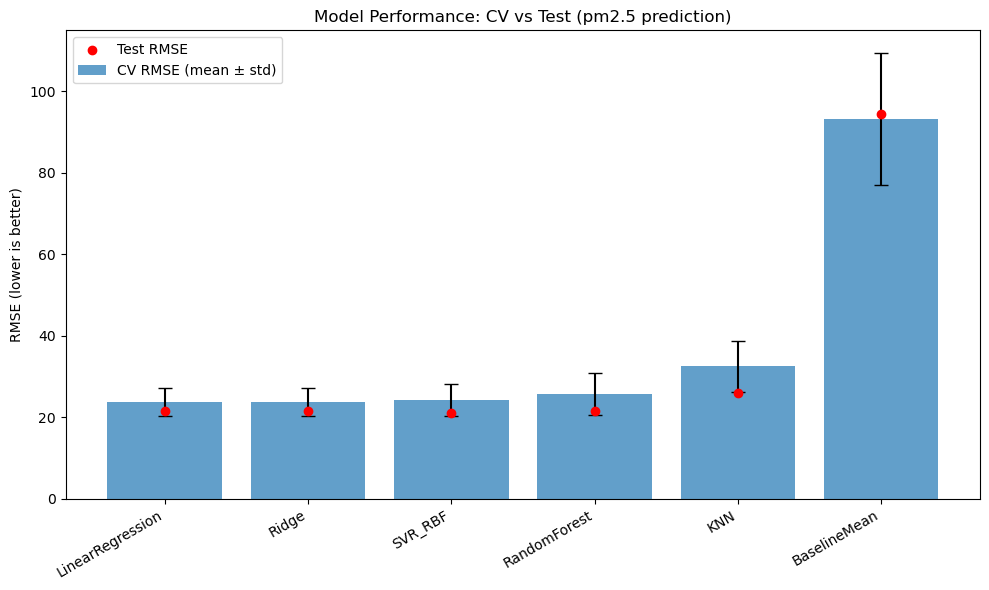

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# tuned_df should be the summary you printed:
# columns: ["cv_rmse_mean", "cv_rmse_std", "val_rmse", "test_rmse"]
# index:   model names ("BaselineMean", "LinearRegression", ...)

# 1) Sort models by CV performance (lower RMSE is better)
plot_df = tuned_df.sort_values("cv_rmse_mean", ascending=True).copy()

models     = plot_df.index.to_list()
cv_means   = plot_df["cv_rmse_mean"].values
cv_stds    = plot_df["cv_rmse_std"].values
test_rmse  = plot_df["test_rmse"].values

x = np.arange(len(models))

# 2) Make the figure
plt.figure(figsize=(10, 6))

# Blue bars = mean CV RMSE, with error bars = std
bar = plt.bar(x, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, label="CV RMSE (mean ± std)")

# Red dots = test RMSE
plt.scatter(x, test_rmse, color="red", marker="o", label="Test RMSE", zorder=3)

# 3) Labels / formatting
plt.xticks(x, models, rotation=30, ha="right")
plt.ylabel("RMSE (lower is better)")
plt.title("Model Performance: CV vs Test (pm2.5 prediction)")
plt.legend()

plt.tight_layout()
plt.show()


#  Interpretability

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Final deployment model
lin_final = LinearRegression(fit_intercept=True)

lin_pipe = Pipeline([
    ("pre", preprocessor),   # your SimpleImputer + StandardScaler
    ("model", lin_final)
])

# Fit on 80% "other" block
lin_pipe.fit(X_other, y_other)

lin_model = lin_pipe.named_steps["model"]
feature_names = preprocessor.get_feature_names_out()


1. Global importance #1 – absolute standardized coefficients

             feature  abs_coeff
8         num__pm2_1  86.768044
1          num__TEMP   9.048887
0          num__DEWP   7.628979
6      num__hour_sin   3.840053
2          num__PRES   1.591708
10  num__pm2_24_mean   1.519706
5            num__Ir   1.483698
9        num__pm2_24   0.746086
3           num__Iws   0.737779
7      num__hour_cos   0.673654


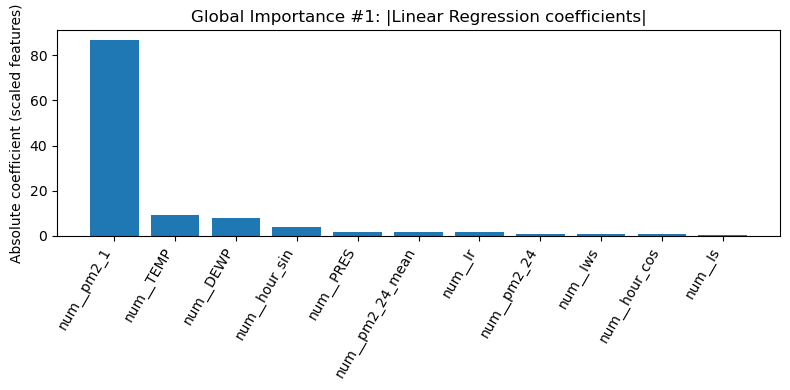

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coefs = lin_model.coef_
abs_coefs = np.abs(coefs)

coef_importance = pd.DataFrame({
    "feature": feature_names,
    "abs_coeff": abs_coefs
}).sort_values("abs_coeff", ascending=False)

print(coef_importance.head(10))

# --- Figure: bar plot of |coefficients| ---
fig, ax = plt.subplots(figsize=(8, 4))
idx = np.arange(len(coef_importance))
ax.bar(idx, coef_importance["abs_coeff"].values)
ax.set_xticks(idx)
ax.set_xticklabels(coef_importance["feature"], rotation=60, ha="right")
ax.set_ylabel("Absolute coefficient (scaled features)")
ax.set_title("Global Importance #1: |Linear Regression coefficients|")
plt.tight_layout()
plt.show()


2. Global importance #2 – permutation importance (test set)

             feature  mean_importance  std_importance
8         num__pm2_1     16180.638774      186.469986
1          num__TEMP       157.844365        3.197032
0          num__DEWP        89.649428        3.823772
6      num__hour_sin        31.140918        1.362415
5            num__Ir         2.615724        0.485901
10  num__pm2_24_mean         2.548649        0.681468
9        num__pm2_24         2.183933        0.349989
2          num__PRES         1.327389        0.724496
3           num__Iws         0.931034        0.358498
7      num__hour_cos         0.643827        0.334162


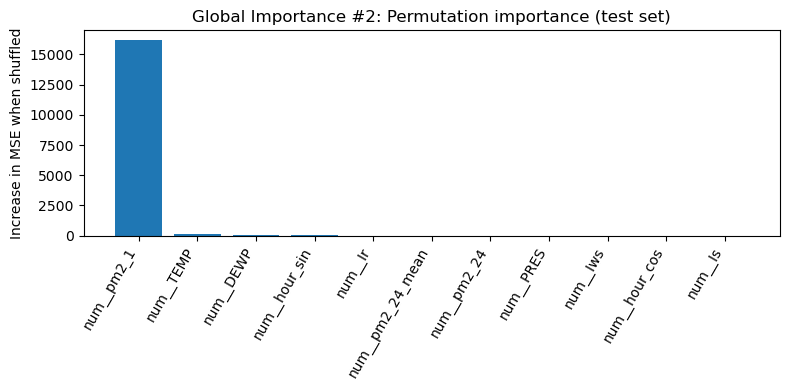

In [84]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    lin_pipe,
    X_test, y_test,
    n_repeats=20,
    scoring="neg_mean_squared_error",
    random_state=42
)

perm_importance = pd.DataFrame({
    "feature": feature_names,
    "mean_importance": np.abs(perm.importances_mean),
    "std_importance": perm.importances_std
}).sort_values("mean_importance", ascending=False)

print(perm_importance.head(10))

# --- Figure: bar plot of permutation importance ---
fig, ax = plt.subplots(figsize=(8, 4))
idx = np.arange(len(perm_importance))
ax.bar(idx, perm_importance["mean_importance"].values)
ax.set_xticks(idx)
ax.set_xticklabels(perm_importance["feature"], rotation=60, ha="right")
ax.set_ylabel("Increase in MSE when shuffled")
ax.set_title("Global Importance #2: Permutation importance (test set)")
plt.tight_layout()
plt.show()


3. Global importance #3 – SHAP (mean |SHAP| on validation)

             feature  mean_abs_shap
8         num__pm2_1      68.850086
1          num__TEMP       7.433499
0          num__DEWP       6.386070
6      num__hour_sin       3.445539
2          num__PRES       1.257425
10  num__pm2_24_mean       1.222382
7      num__hour_cos       0.597935
9        num__pm2_24       0.575697
3           num__Iws       0.372535
5            num__Ir       0.265517


/opt/miniconda3/envs/data1030/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


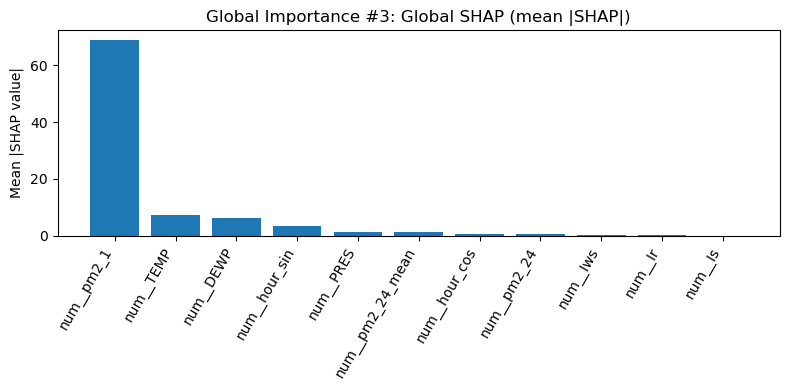

In [85]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess
X_other_proc = preprocessor.transform(X_other)
X_test_proc  = preprocessor.transform(X_test)

explainer = shap.LinearExplainer(
    lin_model,
    X_other_proc,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_test_proc)   # shape: [n_test, n_features]

shap_global = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": np.abs(shap_values).mean(axis=0)
}).sort_values("mean_abs_shap", ascending=False)

print(shap_global.head(10))

# --- Figure: bar plot of global SHAP ---
fig, ax = plt.subplots(figsize=(8, 4))
idx = np.arange(len(shap_global))
ax.bar(idx, shap_global["mean_abs_shap"].values)
ax.set_xticks(idx)
ax.set_xticklabels(shap_global["feature"], rotation=60, ha="right")
ax.set_ylabel("Mean |SHAP value|")
ax.set_title("Global Importance #3: Global SHAP (mean |SHAP|)")
plt.tight_layout()
plt.show()


4. Local interpretability – SHAP for one test example

Local explanation for test index 16
  True PM2.5:      623.00
  Predicted PM2.5: 637.87


/opt/miniconda3/envs/data1030/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


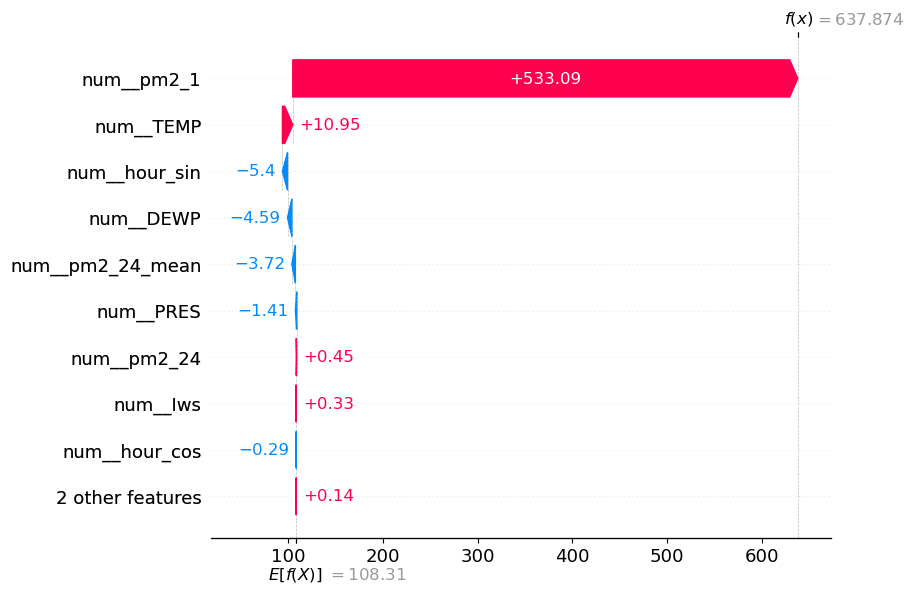

<Figure size 640x480 with 0 Axes>

In [86]:
import shap
import numpy as np
import pandas as pd

# Get processed arrays for explainer background + test set
X_other_proc = preprocessor.transform(X_other)
X_test_proc  = preprocessor.transform(X_test)

# Pull out the linear model and feature names
lin_model = lin_pipe.named_steps["model"]
feature_names = preprocessor.get_feature_names_out()

# SHAP explainer for linear regression
explainer = shap.LinearExplainer(
    lin_model,
    X_other_proc,
    feature_perturbation="interventional"
)

# SHAP values for the test set
shap_values = explainer.shap_values(X_test_proc)   # shape: (n_test, n_features)
base_value  = explainer.expected_value             # E[f(X)]
# Choose an interesting test index (e.g., highest predicted PM2.5)
y_pred_test = lin_pipe.predict(X_test)
idx = int(np.argmax(y_pred_test))   # index in X_test

x_row_raw = X_test.iloc[[idx]]      # DataFrame with a single row
y_true    = y_test.iloc[idx]
y_pred    = y_pred_test[idx]

print(f"Local explanation for test index {idx}")
print(f"  True PM2.5:      {y_true:.2f}")
print(f"  Predicted PM2.5: {y_pred:.2f}")
import matplotlib.pyplot as plt

shap.initjs()

# Waterfall-style explanation (SHAP 0.x legacy API – works well for slides)
fig = shap.plots._waterfall.waterfall_legacy(
    base_value,                  # expected value E[f(X)]
    shap_values[idx],           # SHAP values for this example
    feature_names=feature_names,
    max_display=10              # top 10 features; change if you want
)

plt.tight_layout()
plt.show()


# Outlook
